In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [45]:
data=pd.read_csv("/content/calories.csv")

In [46]:
data.head()
#exercise duration , body Temperature

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [47]:
data.shape

(15000, 9)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [49]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [50]:
data.isnull()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False


In [51]:
data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


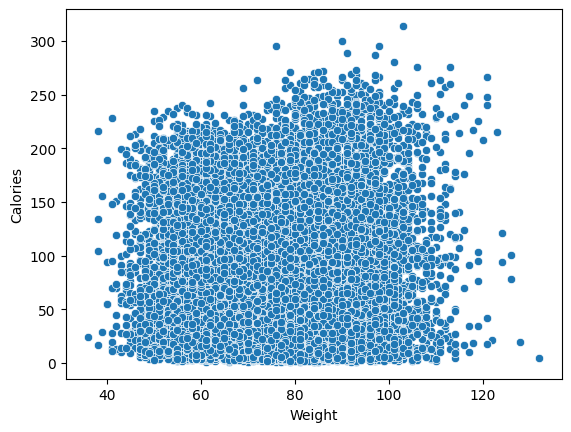

In [52]:
sns.scatterplot(x='Weight',y='Calories',data=data)
plt.show()

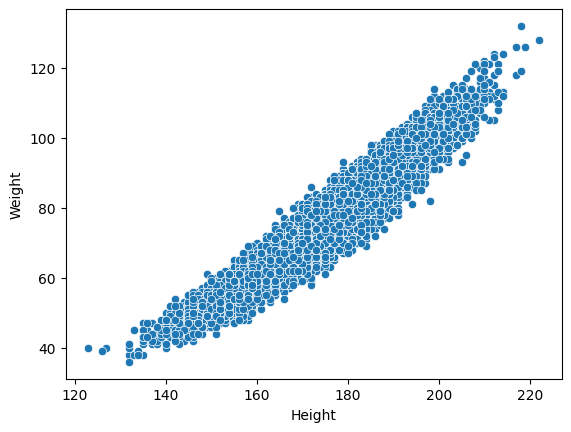

In [53]:
sns.scatterplot(x="Height",y="Weight",data=data)
plt.show()

In [54]:
data.replace({'male':0, 'female':1},inplace=True)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


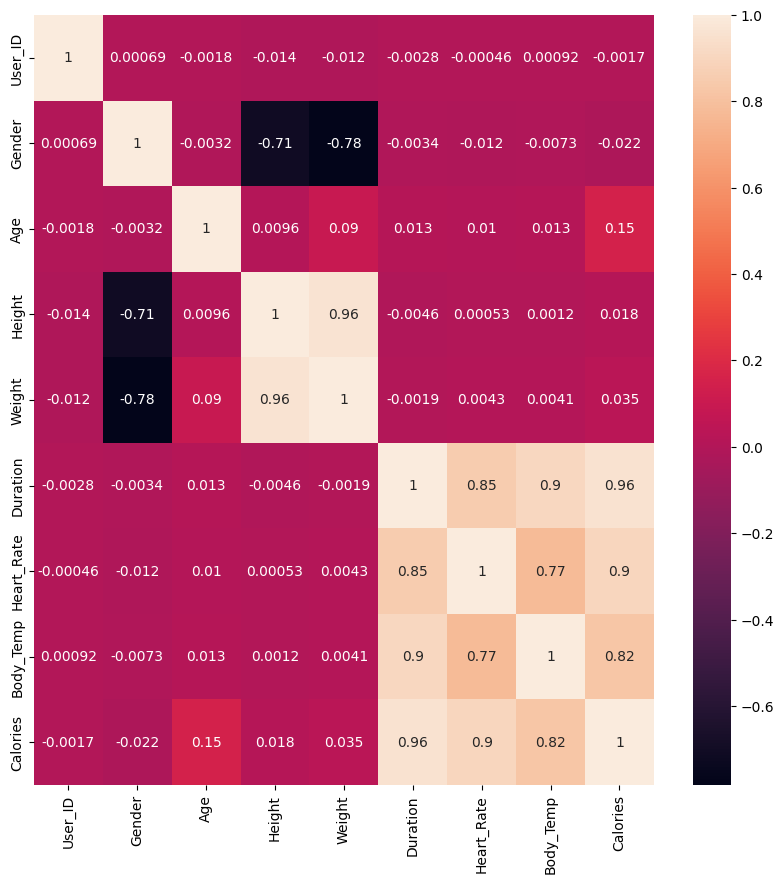

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [56]:
data.drop('User_ID',axis=1,inplace=True)
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [57]:
x=data.drop('Calories',axis=1)
y=data['Calories']

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [59]:
x_train.shape , x_test.shape

((12000, 7), (3000, 7))

In [60]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [61]:
from sklearn.metrics import mean_absolute_error as mae

In [67]:
models=[LinearRegression(),Lasso(),Ridge(),RandomForestRegressor()]
for i in range(4):
  models[i].fit(x_train,y_train)
  print(f'{models[i]} : ' ,end="\n")
  print(models[i].score(x_train,y_train),end="\n")
  print(models[i].score(x_test,y_test),end="\n")
  y_pred=models[i].predict(x_test)
  print(mae(y_test,y_pred),end="\n")

LinearRegression() : 
0.9671621074066676
0.9672937151257295
8.441513553849706
Lasso() : 
0.9611768779711343
0.9608993745233644
9.144387298336847
Ridge() : 
0.9671620573976258
0.9672921799498538
8.441186197335306
RandomForestRegressor() : 
0.9997020172261446
0.9983010529809309
1.6854966666666666


In [68]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [73]:
def calories(data):
  Prediction=model.predict(data)
  return Prediction


In [82]:
# Get input from the user
input_data = input("Enter the values for Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp separated by commas: ")

# Split the input string into a list of values
input_list = input_data.split(',')

# Convert the list of strings to a list of floats
# Assuming the input order is Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp
new_data = [float(x.strip()) for x in input_list]

# Reshape the input data to match the model's expected input shape
new_data = np.array(new_data).reshape(1, -1)

# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Make the prediction
prediction = calories(new_data_scaled)

# Print the prediction
print("Predicted Calories:", prediction[0])
#ex:/ 1 	20 	166.0 	60.0 	14.0 	94.0 	40.3
#actual=66.0

Enter the values for Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp separated by commas: 1,20,166,60,14,94,40
Predicted Calories: 66.16
